In [2]:
#importing the necessary packages 

import numpy as np
import pandas as pd
import os 
from PIL import Image
import matplotlib.pyplot as plt

import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

2025-05-24 17:09:55.941133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748106596.202328      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748106596.280732      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# setting up the data paths

base_dir = '' # base directory
images_dir = os.path.join(base_dir,'dataset/imgs/')                   # images directory
test_dir = os.path.join(base_dir,'dataset/imgs/test/')                # test directory
train_dir = os.path.join(base_dir,'dataset/imgs/train/')              # train directory

driver_imgs_list = pd.read_csv(os.path.join(base_dir,'dataset/driver_imgs_list.csv'))  # images list csv 
sample_sub = pd.read_csv(os.path.join(base_dir,'dataset/sample_submission.csv'))  

In [6]:
driver_imgs_list.head()

subject classname            img
0    p012        c0  img_10206.jpg
1    p012        c0  img_27079.jpg
2    p012        c0  img_50749.jpg
3    p012        c0  img_97089.jpg
4    p012        c0  img_37741.jpg

In [7]:
classes = driver_imgs_list['classname'].unique()
classes

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
      dtype=object)

In [8]:
class_def = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

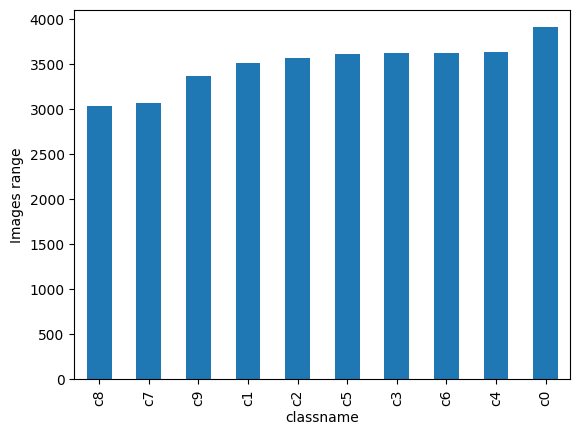

In [9]:
driver_imgs_list.groupby('classname')['img'].count().sort_values().plot(kind='bar')
plt.ylabel('Images range')
plt.show()

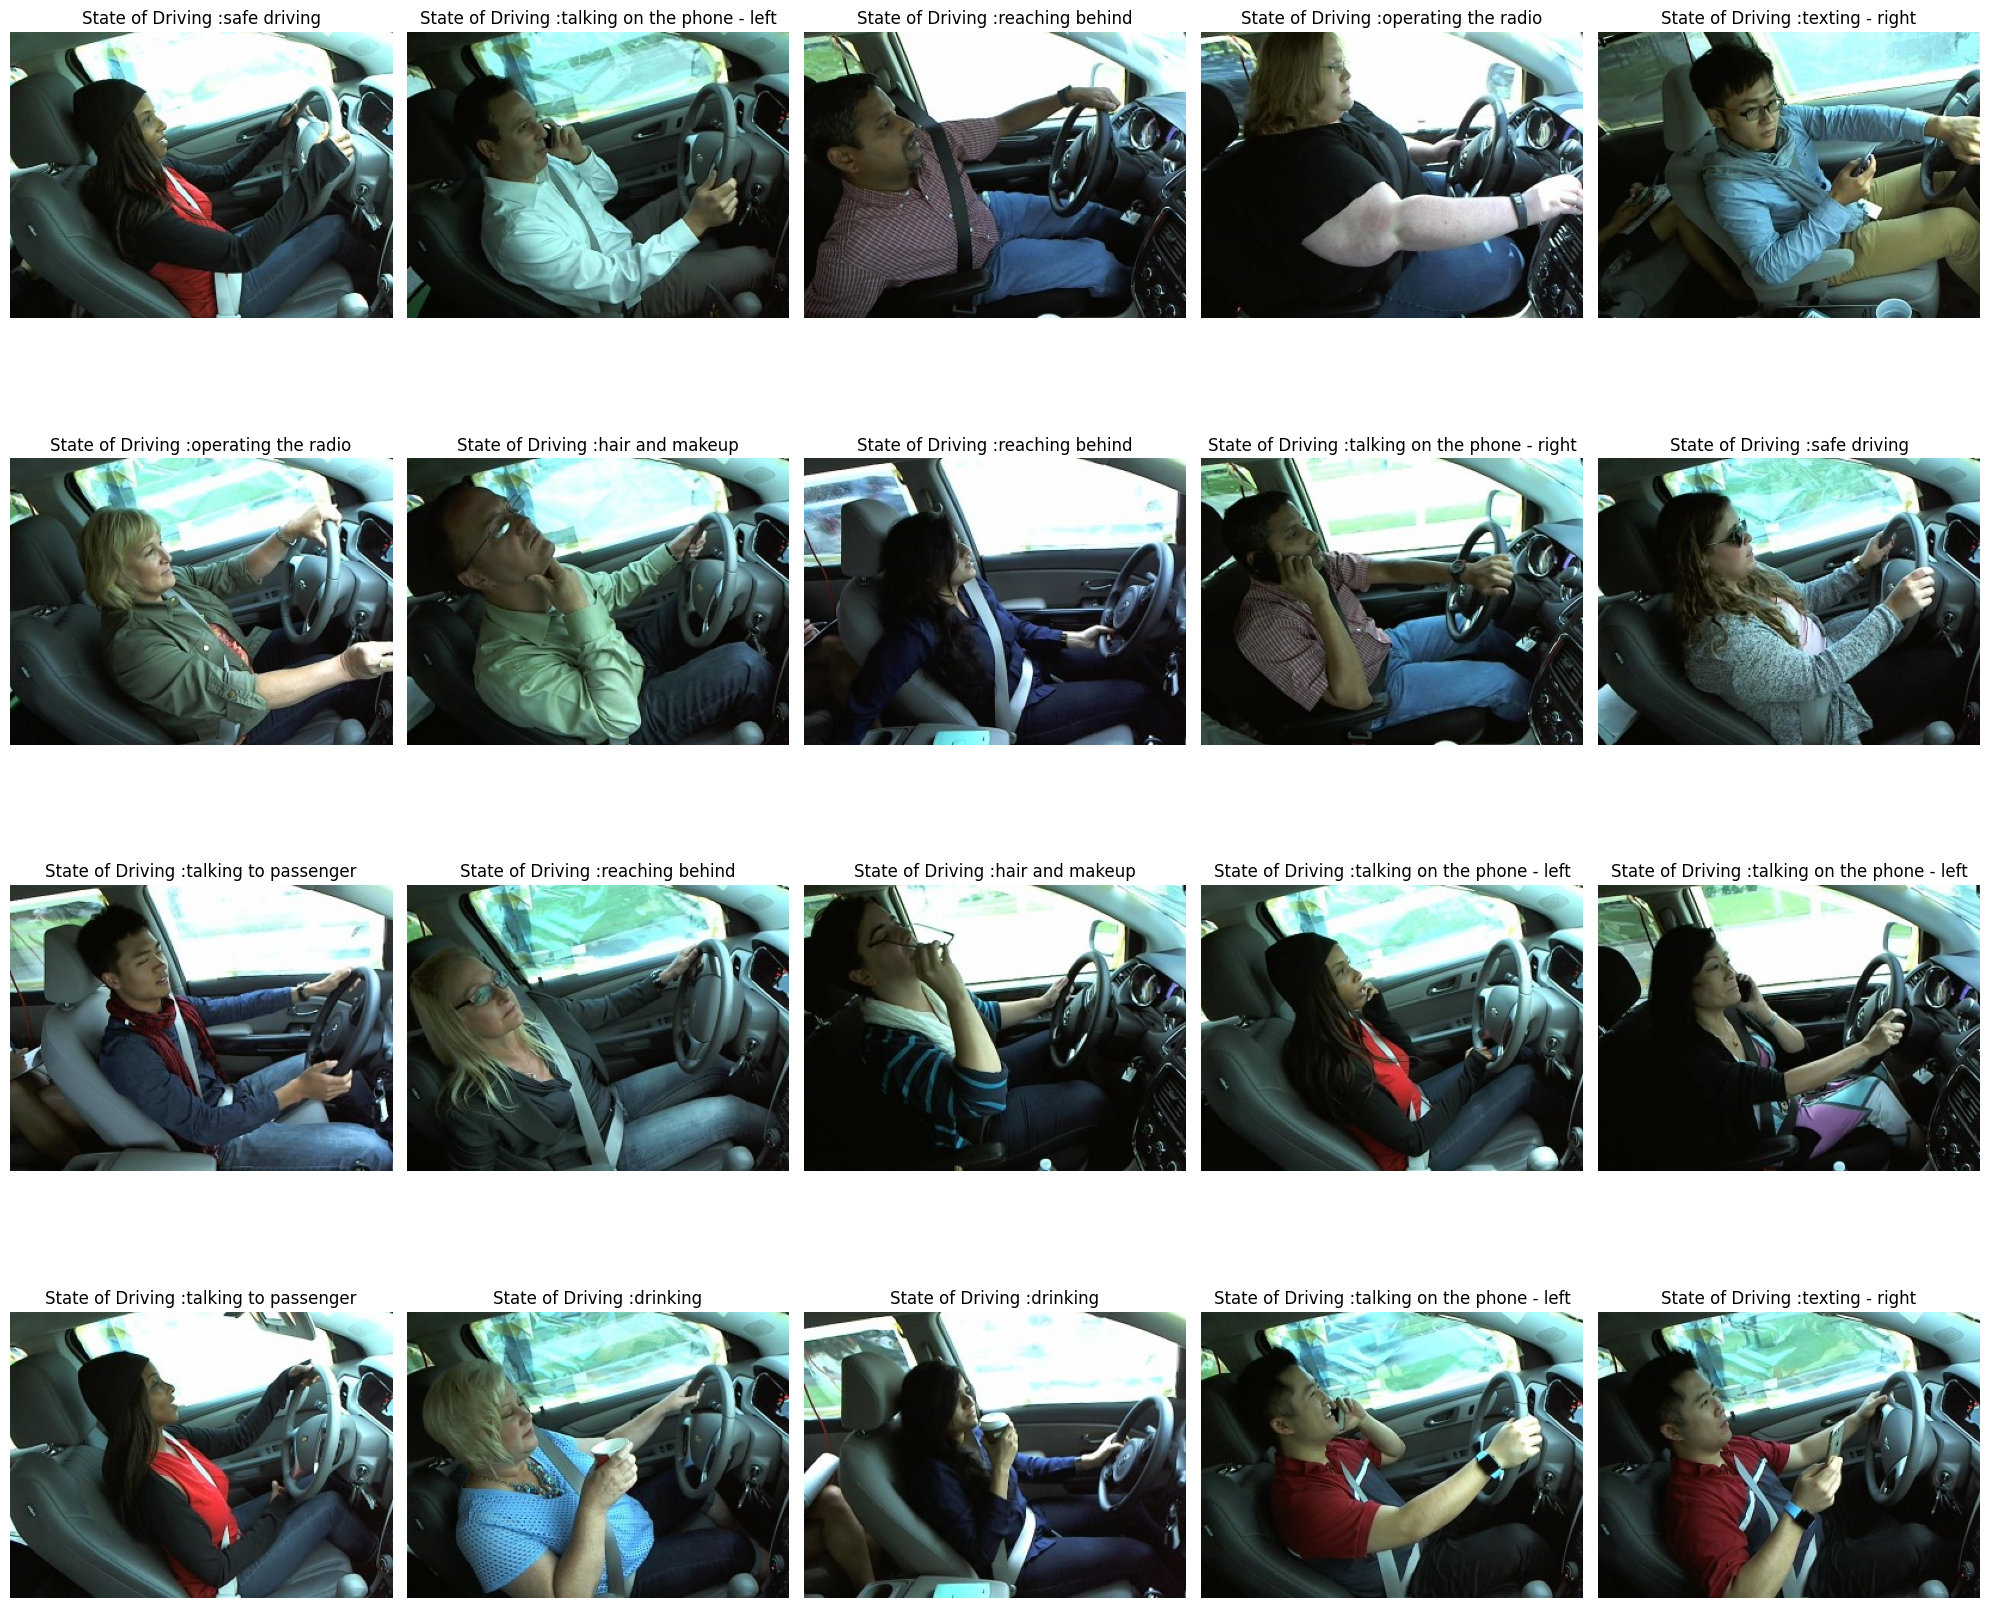

In [ ]:
fig = plt.figure(figsize=(20,18)) # image size
cols,rows = 5,4                   

for i in range(1,cols*rows+1):
    pic_indx = random.randint(0,driver_imgs_list.shape[0])
    img = Image.open(os.path.join(base_dir,'dataset/imgs/train/')+str(driver_imgs_list.loc[pic_indx,'classname']+'/')
                    + str(driver_imgs_list.loc[pic_indx,'img']))
    fig.add_subplot(rows,cols,i)
    plt.imshow(img)
    plt.title('State of Driving :'+ class_def[driver_imgs_list.loc[pic_indx,'classname']])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img = Image.open('dataset/imgs/test/img_100015.jpg')
print(img.size)

(320, 240)


In [19]:
image_size = (128,128)  # image shape
batch_size = 32
val_size = 0.2

train_data_gen = ImageDataGenerator(rescale=1./255,validation_split= val_size)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [20]:
# defining the training parameters


train_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = image_size,
                                                     batch_size = batch_size,
                                                     seed=42, 
                                                     shuffle=True,
                                                     subset='training')

val_generator =  train_data_gen.flow_from_directory(train_dir,
                                               target_size = image_size,
                                               batch_size = batch_size,
                                               seed=42, 
                                               shuffle=True,
                                               subset='validation')

Found 13975 images belonging to 10 classes.
Found 3487 images belonging to 10 classes.


In [21]:
for data_batch,label_batch in train_generator:
    print(data_batch.shape)   # train batch
    print(label_batch.shape)  # label batch
    break

(32, 128, 128, 3)
(32, 10)


In [22]:
model = Sequential()                                                  # creating a sequential model
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3))) # taking units of 32 and filter of 3x3
model.add(MaxPooling2D(2,2))                                          # maxpool layer with 2x2 filter   
model.add(Conv2D(64,(3,3),activation='relu'))                         # taking units of 64 and filter of 3x3
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))                        # taking units of 128 and filter of 3x3
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))                        # taking units of 256 and filter of 3x3
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3),activation='relu'))                        # taking units of 512 and filter of 3x3
model.add(MaxPooling2D(2,2))    
model.add(Flatten())                                                  # flattening the data to feed into to Dense layer
model.add(Dense(1024,activation='relu'))                              # taking units of 1024
model.add(Dense(512,activation='relu'))                               # taking units of 512 
model.add(Dense(128,activation='relu'))                               # taking units of 128
model.add(Dense(10,activation='softmax'))                             # output later with units of 10 since 10 labels

model.summary() # to print summary of model architecture

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,258,506 (16.24 MB)

 Trainable params: 4,258,506 (16.24 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


437/437 ━━━━━━━━━━━━━━━━━━━━ 336s 755ms/step - accuracy: 0.2231 - loss: 2.0140 - val_accuracy: 0.8451 - val_loss: 0.4564
Epoch 2/3
437/437 ━━━━━━━━━━━━━━━━━━━━ 320s 731ms/step - accuracy: 0.8773 - loss: 0.3621 - val_accuracy: 0.9447 - val_loss: 0.1884
Epoch 3/3
437/437 ━━━━━━━━━━━━━━━━━━━━ 339s 774ms/step - accuracy: 0.9622 - loss: 0.1338 - val_accuracy: 0.9578 - val_loss: 0.1420


In [ ]:
model.save('model/distracted_driver.h5')

In [26]:
tr_loss = history.history['loss']
tr_accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

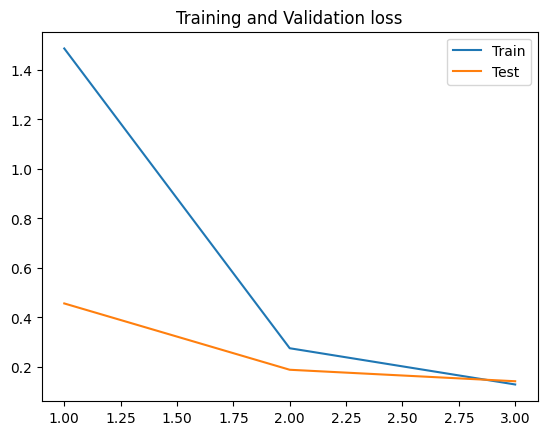

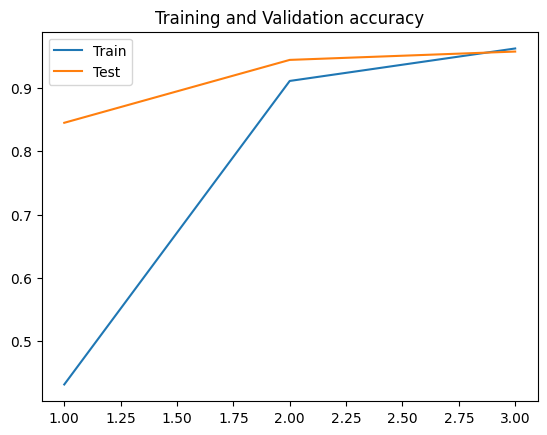

In [27]:
epchs = list(range(1,len(tr_loss)+1))
plt.plot(epchs,tr_loss,label='Train')
plt.plot(epchs,val_loss,label='Test')
plt.title("Training and Validation loss")
plt.legend()
plt.show()


plt.plot(epchs,tr_accuracy,label='Train')
plt.plot(epchs,val_accuracy,label='Test')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

In [28]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    images_dir,
    shuffle = False,
    target_size = image_size,
    classes = ['test'],
    batch_size = 32
)

Found 4961 images belonging to 1 classes.


In [29]:
preds = model.predict(test_data)

156/156 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step


In [30]:
# predictions on one batch of images

for data_batch,label_batch in test_data:
#     print(data_batch.shape,label_batch.shape)
    print(model.predict(data_batch).argmax(axis=1))
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
[8 5 1 7 5 8 8 6 0 6 8 4 6 8 8 9 1 8 8 8 8 8 6 0 3 8 8 1 8 6 3 1]
